In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import imdb

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
print(f'訓練資料總比數:{len(x_train)}')
print(f'測試資料總比數:{len(x_test)}')

訓練資料總比數:25000
測試資料總比數:25000


# 因為資料長度不一需要統一長度

In [6]:
from keras.preprocessing import sequence

# 將資料分成不同的maxlen

In [7]:
x_train1 = sequence.pad_sequences(x_train, maxlen=150)
x_test1 = sequence.pad_sequences(x_test, maxlen=150)
x_train2 = sequence.pad_sequences(x_train, maxlen=250)
x_test2 = sequence.pad_sequences(x_test, maxlen=250)
x_train3 = sequence.pad_sequences(x_train, maxlen=350)
x_test3 = sequence.pad_sequences(x_test, maxlen=350)

# 文字要壓到N維
# LSTM有K個神經元

In [8]:
N = 50 #文字要壓到N維
K = 10 #LSTM有K個神經元

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# 加入Early stopping 避免Over-fitting

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=2)

# MODEL1 data_maxlen=150

In [11]:
model1 = Sequential()
model1.add(Embedding(10000, N))
model1.add(LSTM(K))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 502,451
Trainable params: 502,451
Non-trainable params: 0
_________________________________________________________________


In [12]:
Model1 = model1.fit(x_train1, y_train, batch_size=32, epochs=10, validation_data = (x_test1,y_test), callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.4442 - acc: 0.8004 - val_loss: 0.3261 - val_acc: 0.8622
Epoch 2/10
25000/25000 [==============================] - 76s 3ms/step - loss: 0.2663 - acc: 0.9046 - val_loss: 0.3316 - val_acc: 0.8643
Epoch 3/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.2048 - acc: 0.9313 - val_loss: 0.3484 - val_acc: 0.8627
Epoch 00003: early stopping


# MODEL2 data_maxlen=250

In [13]:
model2 = Sequential()
model2.add(Embedding(10000, N))
model2.add(LSTM(K))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 502,451
Trainable params: 502,451
Non-trainable params: 0
_________________________________________________________________


In [14]:
Model2 = model2.fit(x_train2, y_train, batch_size=32, epochs=10, validation_data = (x_test2,y_test), callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 117s 5ms/step - loss: 0.4793 - acc: 0.7854 - val_loss: 0.3689 - val_acc: 0.8461
Epoch 2/10
25000/25000 [==============================] - 141s 6ms/step - loss: 0.3397 - acc: 0.8747 - val_loss: 0.3747 - val_acc: 0.8524
Epoch 3/10
25000/25000 [==============================] - 147s 6ms/step - loss: 0.2542 - acc: 0.9114 - val_loss: 0.3429 - val_acc: 0.8674
Epoch 4/10
25000/25000 [==============================] - 125s 5ms/step - loss: 0.1952 - acc: 0.9347 - val_loss: 0.3701 - val_acc: 0.8682
Epoch 5/10
25000/25000 [==============================] - 122s 5ms/step - loss: 0.1650 - acc: 0.9474 - val_loss: 0.3908 - val_acc: 0.8674
Epoch 00005: early stopping


# MODEL3 data_maxlen=350

In [15]:
model3 = Sequential()
model3.add(Embedding(10000, N))
model3.add(LSTM(K))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 502,451
Trainable params: 502,451
Non-trainable params: 0
_________________________________________________________________


In [16]:
Model3 = model3.fit(x_train3, y_train, batch_size=32, epochs=10, validation_data = (x_test3,y_test), callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 165s 7ms/step - loss: 0.4647 - acc: 0.7944 - val_loss: 0.3633 - val_acc: 0.8470
Epoch 2/10
25000/25000 [==============================] - 160s 6ms/step - loss: 0.2788 - acc: 0.9020 - val_loss: 0.3112 - val_acc: 0.8754
Epoch 3/10
25000/25000 [==============================] - 158s 6ms/step - loss: 0.2095 - acc: 0.9302 - val_loss: 0.3239 - val_acc: 0.8665
Epoch 4/10
25000/25000 [==============================] - 162s 6ms/step - loss: 0.1695 - acc: 0.9464 - val_loss: 0.3627 - val_acc: 0.8736
Epoch 00004: early stopping


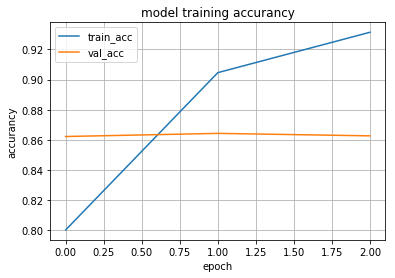

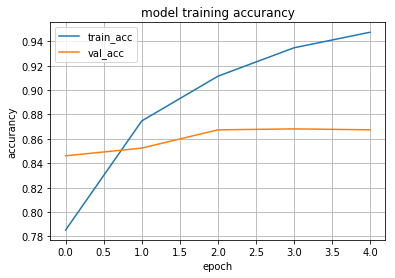

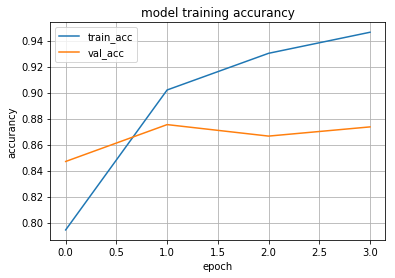

In [20]:
plt.plot(Model1.history['acc'])
plt.plot(Model1.history['val_acc'])
plt.title('model training accurancy')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.legend(['train_acc','val_acc'],loc='best')
plt.grid()
plt.show()

plt.plot(Model2.history['acc'])
plt.plot(Model2.history['val_acc'])
plt.title('model training accurancy')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.legend(['train_acc','val_acc'],loc='best')
plt.grid()
plt.show()

plt.plot(Model3.history['acc'])
plt.plot(Model3.history['val_acc'])
plt.title('model training accurancy')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.legend(['train_acc','val_acc'],loc='best')
plt.grid()
plt.show()

In [22]:
score = model1.evaluate(x_test1,y_test)
print(f'model1 valid_loss:{score[0]}, valid_accurancy:{score[1]}')
score = model2.evaluate(x_test1,y_test)
print(f'model2 valid_loss:{score[0]}, valid_accurancy:{score[1]}')
score = model3.evaluate(x_test1,y_test)
print(f'model3 valid_loss:{score[0]}, valid_accurancy:{score[1]}')

25000/25000 [==============================] - 12s 466us/step
model1 valid_loss:0.34844840408325195, valid_accurancy:0.86268
25000/25000 [==============================] - 11s 454us/step
model2 valid_loss:0.4123147798633575, valid_accurancy:0.85892
25000/25000 [==============================] - 11s 456us/step
model3 valid_loss:0.3913681066393852, valid_accurancy:0.86248


# 結論
由於訓練集以及測試集的資料數是相同的，故推測這是可能容易產生over-fitting的可能，訓練集的模型無法有效涵蓋到測試集某些的狀態，造成validation accurancy 到了某種程度就無法再上升，所以使用early stoppoing、增加資料的maxlen以及使用dropout看是否能將測試集的正確率往上提升